### AI-06 Quiz  

#### Import libraries  

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

#### Parameters  

In [11]:
csv_in = '../ai-05/iris.csv'

#### Read CSV file  

In [12]:
df = pd.read_csv(csv_in, delimiter=',', skiprows=2, header=0)
print(df.shape)
print(df.info())
display(df.head())

(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepal_len    150 non-null    float64
 1   sepal_width  150 non-null    float64
 2   petal_len    150 non-null    float64
 3   petal_width  150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_len,sepal_width,petal_len,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Separate data  

In [13]:
df_data = df.loc[:, ['petal_len', 'petal_width']]
print(df_data.shape)
display(df_data.head())
iris = df_data.index

(150, 2)


,petal_len,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


#### Execute clustering  

In [14]:
Z = linkage(df_data, method='ward', metric='euclidean')
n_data = Z.shape[0]
df_Z = pd.DataFrame(Z,
                    columns=['label1', 'label2',
                             'distance', '#members'],
                    index=['merged{}'.format(i+1+n_data) 
                           for i in range(n_data)])
df_Z['label1'] = df_Z['label1'].astype('int')
df_Z['label2'] = df_Z['label2'].astype('int')
df_Z['#members'] = df_Z['#members'].astype('int')
display(df_Z.head())
display(df_Z.tail())

,label1,label2,distance,#members
merged150,0,1,0.0,2
merged151,4,150,0.0,3
merged152,2,36,0.0,2
merged153,3,7,0.0,2
merged154,8,151,0.0,4


,label1,label2,distance,#members
merged294,270,293,2.409332,28
merged295,288,292,3.569174,46
merged296,291,294,4.674433,54
merged297,295,296,10.527679,100
merged298,290,297,30.438997,150


#### Draw dendgrogram  

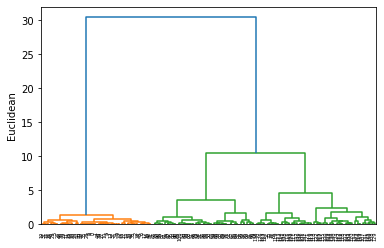

In [15]:
dendr = dendrogram(Z, labels=iris)
plt.xticks(rotation=90)
plt.ylabel('Euclidean')
plt.show()

#### Get results of clustering  

In [16]:
dist = df_Z['distance']
n_clusters = 3
print('=== n_clusters:', n_clusters, '===')
cls = pd.Series(fcluster(Z, n_clusters, criterion='maxclust'), index=iris)
print('dist:', dist[n_data-n_clusters])
print(cls.head())

=== n_clusters: 3 ===
dist: 4.674433184924735
0    1
1    1
2    1
3    1
4    1
dtype: int32


#### Make cross table  

In [17]:
ct = pd.crosstab(df['class'], cls)
display(ct)

col_0,1,2,3
class,,,
Iris-setosa,50,0,0
Iris-versicolor,0,45,5
Iris-virginica,0,1,49


**Ans. 1 (or 0 or 49)**  

#### Draw scatter plot  

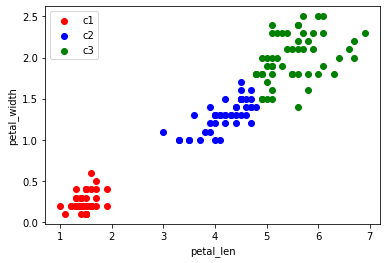

In [18]:
n_clusters = 3
colors = ['red', 'blue', 'green']

for i in range(n_clusters):
    df_c = df[ cls==i+1 ]
    c = colors[i]
    label = 'c{}'.format(i+1)
    plt.scatter(df_c['petal_len'], df_c['petal_width'], color=c, label=label)

plt.xlabel('petal_len')
plt.ylabel('petal_width')
plt.legend()
plt.show()